# HSV color space
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02a_basic_image_processing/hsv.ipynb)



In [1]:
# to run in google colab
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np

if "google.colab" in sys.modules:

    def download_from_web(url):
        import requests

        response = requests.get(url)
        if response.status_code == 200:
            with open(url.split("/")[-1], "wb") as file:
                file.write(response.content)
        else:
            raise Exception(f"Failed to download the image. Status code: {response.status_code}")

    download_from_web("https://github.com/YoniChechik/AI_is_Math/raw/master/c_02a_basic_image_processing/grass.jpg")


In [2]:
# Adopted from: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

figsize = (10, 10)


Read basic image:



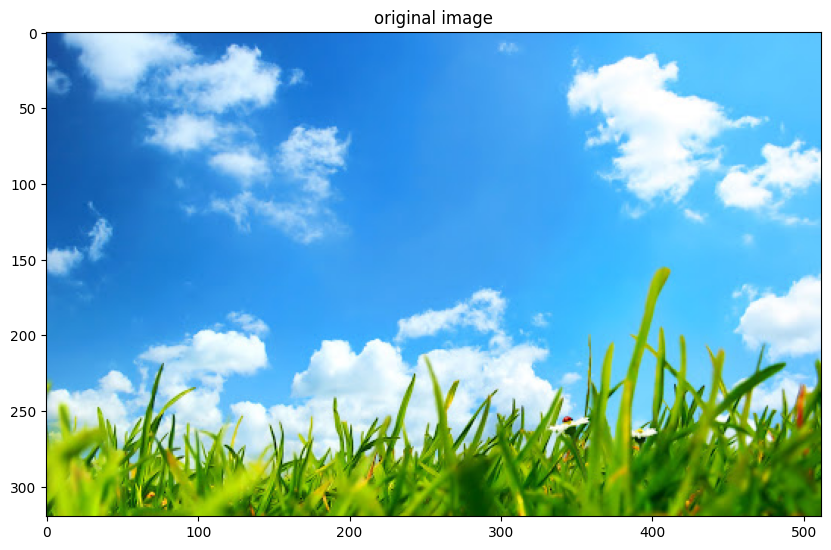

In [3]:
bgr_im = cv2.imread("grass.jpg")
rgb_im = cv2.cvtColor(bgr_im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=figsize)
plt.imshow(rgb_im)
plt.title("original image")
plt.show()


We want to separate the grass from the sky. we'll do this by masking all pixels in the image that are not green.

First, find HSV green



In [4]:
rgb_green = np.uint8([[[0, 255, 0]]])  # 3d array just because this is what cvtColor expects...
hsv_green = cv2.cvtColor(rgb_green, cv2.COLOR_RGB2HSV)[0, 0, :]
print(hsv_green)


[ 60 255 255]


Second, convert the image to HSV and threshold only the green color and neighborhood.

We will take hue TH of +30 and -70 (because it's farther from blue- the sky).
Let's take all saturation and value variants of green in the TH.

Masking all that is in the TH should give us only the grass

<img src="https://github.com/YoniChechik/AI_is_Math/raw/master/c_02a_basic_image_processing/hsv_th.png" alt="hsv threshold for green" width="500"/>




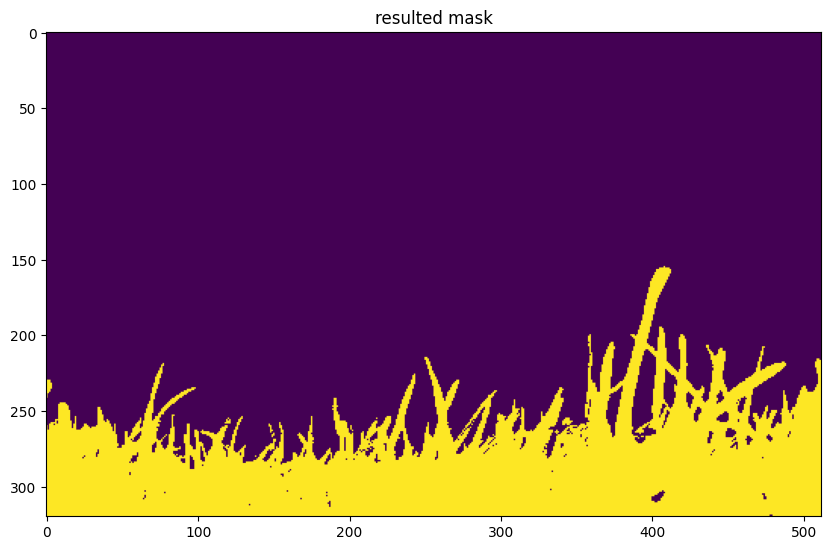

In [5]:
# Convert BGR to HSV
hsv_im = cv2.cvtColor(rgb_im, cv2.COLOR_RGB2HSV)

# define range of hue and intensity
lower_th = hsv_green - np.array([70, 200, 200])
upper_th = hsv_green + np.array([30, 0, 0])

# Threshold the HSV image
mask = cv2.inRange(hsv_im, lower_th, upper_th)

plt.figure(figsize=figsize)
plt.imshow(mask)
plt.title("resulted mask")
plt.show()


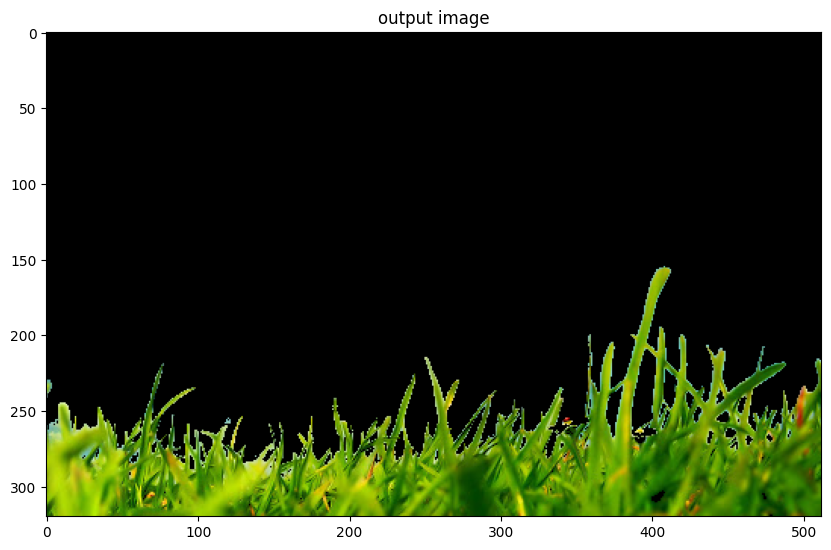

In [6]:
# Trick: apply 2d mask on 3d image
rgb_res = cv2.bitwise_and(rgb_im, rgb_im, mask=mask)

plt.figure(figsize=figsize)
plt.imshow(rgb_res)
plt.title("output image")
plt.show()
